In [126]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib gtk3

In [127]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        if df['config'][i][key] == cond:
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x, verbose=False):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    if verbose:
        print(f"Run length: {len(x)}")
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            steps = np.linspace(0, steps[-1], len(data))
            ax.plot(steps, f(data))
            ax.set(title=keys[ax_idx], xlabel='steps')#, xlim=[0,1.4e6])
    plt.legend([x for x in df['name']], loc='lower left')
    
def plot_saver(df, key, f=None):
    '''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

        #plt.legend([x for x in df['name']], loc='lower left')    

In [128]:
keys = ['eval/eval_ep_rew', 'ep_rew', 'eval/success_rate', 'eval/success_rate']
df = pd.read_pickle('flat-agent-experiments.pyc')


df

,name,config,_step,eval/eval_ep_rew,eval/eval_intr_rew,eval/success_rate,c_step,ep_rew
0,hiro_not_working,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[254, 2094, 6244, 9721, 11841, 13913, 14672, 1...","[-271.67451171875, -326.847216796875, -292.191...","[-984.26953125, -958.9201171875, -907.30498046...","[0.2, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...","[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10....","[-250.41574096679688, -255.8821258544922, -185..."
1,perfect_flat,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[1972, 2050, 2897, 4089, 4343, 5220, 10127, 10...","[-178.95869140625, -176.25860595703125, -86.12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.1, 0.3, 0.6, 0.6, 0.7, 0.9, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-143.3597412109375, -313.0930480957031, -280...."
2,different-dream-31,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[3461, 7731, 9985, 16715, 18156, 26370, 29948,...","[-262.5913330078125, -158.838134765625, -267.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.3, 0.0, 0.1, 0.2, 0.1, 0.2, 0.0, 0.4, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-791.471435546875, -861.180908203125, -833.78..."
3,quiet-night-22,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[864, 3553, 4130, 5291, 5622, 6289, 6933, 9012...","[-299.0, -299.0, -299.0, -299.0, -299.0, -292....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-299.0, -299.0, -299.0, -299.0, -299.0, -299...."
4,fearless-snow-20,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[584, 792, 978, 2981, 3159, 3766, 3817, 4501, ...","[-115.9259765625, -131.9227294921875, -98.4258...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3, 0.3, 0.5, 0.5, 0.6, 0.4, 0.8, 0.6, 0.6, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-247.24708557128906, -269.46942138671875, -28..."
5,denim-wildflower-15,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[521, 815, 3519, 3891, 5669, 7992, 10932, 1188...","[-196.998828125, -110.0936767578125, -69.52884...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.4, 0.7, 0.5, 0.9, 0.8, 0.8, 0.9, 0.8, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-242.34884643554688, -197.4285430908203, -352..."
6,vague-pyramid-14,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[901, 2066, 2495, 3701, 5485, 6463, 9364, 9381...","[-163.891015625, -146.11083984375, -108.692260...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.2, 0.3, 0.6, 0.5, 0.8, 0.6, 0.7, 0.9, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-365.3077697753906, -395.1168212890625, -291...."
7,dainty-fire-13,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[21, 564, 3642, 4067, 4187, 5150, 5480, 6810, ...","[-146.39586181640624, -62.68892822265625, -77....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2, 0.7, 0.5, 0.3, 0.9, 0.8, 1.0, 1.0, 0.6, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-294.7652587890625, -273.78802490234375, -230..."
8,splendid-planet-12,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[98, 2627, 3250, 5255, 6088, 7323, 8387, 12554...","[-174.07347412109374, -166.4599609375, -41.030...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1, 0.1, 0.8, 0.6, 0.8, 1.0, 1.0, 0.7, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-375.2664794921875, -287.9431457519531, -280...."
9,stoic-brook-11,"{'env': 'Vrep', 'log': True, 'tau': 0.00533, '...","[1040, 1915, 3487, 3540, 7508, 8413, 8504, 928...","[-198.4054443359375, -156.07904052734375, -85....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2, 0.2, 0.4, 0.7, 0.7, 0.9, 0.9, 0.5, 0.8, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-338.0489196777344, -388.91046142578125, -340..."


In [129]:
#df = get_df_selection(df, 'ee_j_pos', True)
#df = get_df_selection(df, 'force', False)


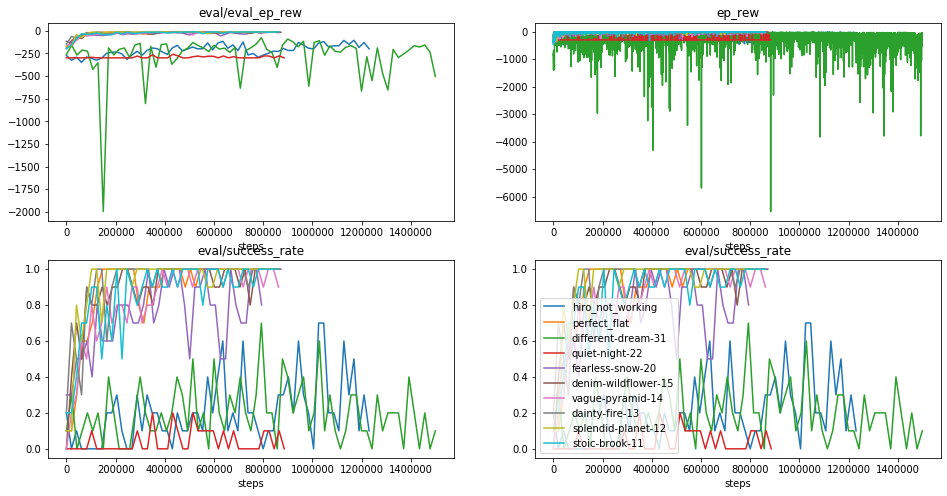

In [130]:
plotter(df, keys)

In [131]:
cumul_ep_rew = [cumulative_reward(x) if len(x) > 0 else 0 for x in df[keys[1]]]


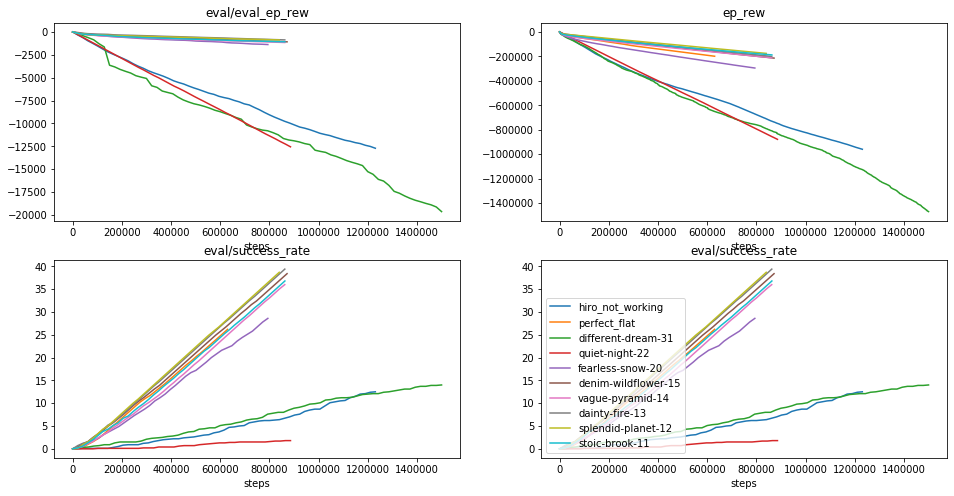

In [132]:
plotter(df, keys, cumulative_reward)

In [133]:
df['name']

0       hiro_not_working
1           perfect_flat
2     different-dream-31
3         quiet-night-22
4       fearless-snow-20
5    denim-wildflower-15
6       vague-pyramid-14
7         dainty-fire-13
8     splendid-planet-12
9         stoic-brook-11
Name: name, dtype: object

In [134]:
run_hrl = df.iloc[8]
run_flat = df.iloc[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


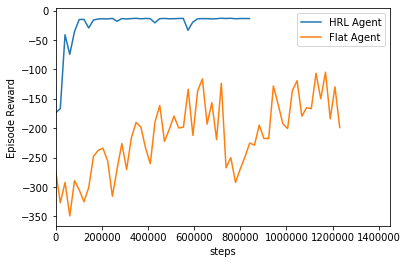

In [135]:
steps = run_hrl['_step']
data = run_hrl['eval/eval_ep_rew']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
steps = run_flat['_step']
data = run_flat['eval/eval_ep_rew']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
plt.xlim([0, 1.45e6])
plt.xlabel('steps')
plt.ylabel('Episode Reward')
plt.legend(['HRL Agent', 'Flat Agent'])
plt.savefig('hrl_flat_ep_rew.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


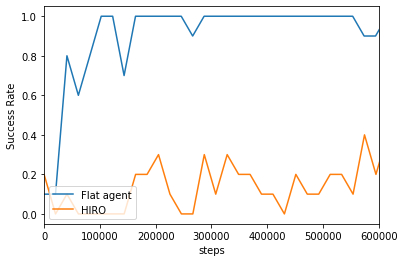

In [136]:
steps = run_hrl['_step']
data = run_hrl['eval/success_rate']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
steps = run_flat['_step']
data = run_flat['eval/success_rate']
plt.plot(np.linspace(0, steps[-1], len(data)), data)
plt.xlim([0, 600000])
plt.xlabel('steps')
plt.ylabel('Success Rate')
plt.legend(['Flat agent', 'HIRO'], loc='lower left')
plt.savefig('success_hrl_flat.eps')

In [137]:
'''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

IndentationError: unexpected indent (<ipython-input-137-389ef544d123>, line 2)

In [ ]:
df = get_df_selection(df, 'decay', True)
df = get_df_selection(df, 'ee_j_pos', True)

key = 'eval/success_rate'


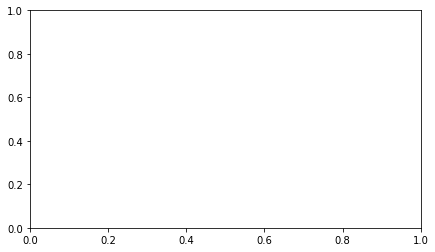

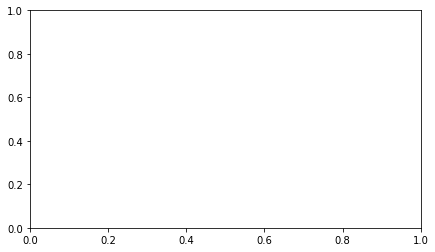

In [53]:
plot_saver(df, key)
plot_saver(df, key, cumulative_reward)

In [157]:
df

,name,config,_step,eval/eval_ep_rew,eval/eval_intr_rew,eval/success_rate,c_step,ep_rew
0,valiant-oath-141,"{'flags': {'struct': True, 'readonly': None}, ...","[155, 158, 386, 1578, 1621, 1975, 2577, 2647, ...","[-321.6762045081, -443.0073907556, -443.052159...","[-1462.8956054688, -1170.09296875, -1551.98056...","[0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 99.0, 99.0, 99.0, 98.0, 98.0, 98....","[-257.3820896098, -376.1575036491, -588.703813..."
1,radiant-dream-136,"{'flags': {'struct': True, 'readonly': None}, ...","[6946, 17959, 19940, 26686, 30627, 40368, 4473...","[-379.1418085877, -376.2289990312, -286.191291...","[-1391.4228515625, -1399.852734375, -984.31562...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 99.0, 98.0, 98.0, 98.0, 98.0, 97....","[-253.5685169429, -289.9070637993, -646.553378..."
2,faithful-meadow-130,"{'flags': {'struct': True, 'readonly': None}, ...","[1897, 4464, 7820, 7831, 13532, 19775, 20219, ...","[-322.7170023497, -404.1722469387, -279.386036...","[-1076.1142578125, -1236.7418945312, -946.3885...","[0.0, 0.0, 0.4, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, ...","[99.0, 99.0, 98.0, 98.0, 98.0, 97.0, 97.0, 97....","[-284.772692475, -340.3605071269, -666.6711594..."


In [149]:
df['config'][2]

{'flags': {'struct': True, 'readonly': None},
 'parent': None,
 'content': {'env': 'Vrep',
  'log': 'True',
  'tau': '0.005',
  'mock': 'False',
  'seed': '2',
  'vrep': 'True',
  'decay': 'True',
  'force': 'True',
  'ri_re': 'False',
  'visit': 'False',
  'c_step': '100',
  'ee_pos': 'False',
  'entity': 'rlpractitioner',
  'policy': 'TD3',
  'render': 'False',
  'discount': '0.99',
  'ee_j_pos': 'True',
  'sub_mock': 'False',
  'zero_obs': '0',
  'eval_freq': '30000',
  'goal_type': 'Absolute',
  'meta_mock': 'False',
  'offpolicy': 'False',
  'sub_noise': '50.0',
  'batch_size': '128',
  'expl_noise': '0.1',
  'flat_agent': 'False',
  'load_model': 'False',
  'meta_noise': '0.5',
  'noise_clip': '0.5',
  'save_model': 'False',
  'sparse_rew': 'False',
  'sub_ctr_lr': '0.0001',
  'time_limit': '300',
  'meta_ctr_lr': '0.01',
  'policy_freq': '2',
  'sub_actr_lr': '0.0001',
  'meta_actr_lr': '0.0001',
  'policy_noise': '0.2',
  'step_decayer': "{'total_steps': 500000, 'init_step': '$